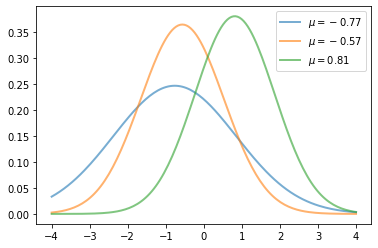

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
from random import uniform

fig, ax= plt.subplots()
x = np.linspace(-4,4,150)
for i in range(3):  #insert three times
    m,s=uniform(-1,1),uniform(1,2)
    y=norm.pdf(x,loc=m,scale=s)
    current_label=f'$\mu = {m:.2}$'
    ax.plot(x,y,linewidth=2,alpha=0.6,label=current_label)
ax.legend()
plt.show()

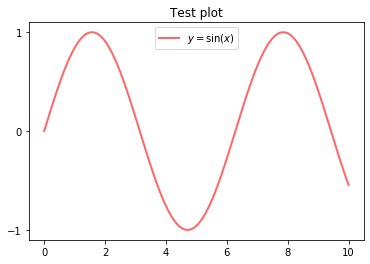

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('Test plot')
plt.show()

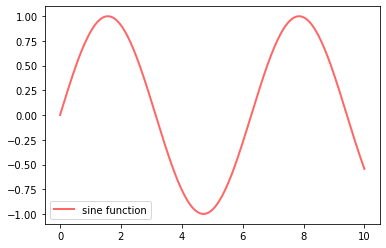

In [12]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend()
plt.show()

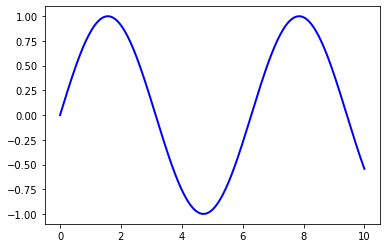

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
x = np.linspace(0, 10, 200)
y = np.sin(x)
plt.plot(x, y, 'b-', linewidth=2)
plt.show()

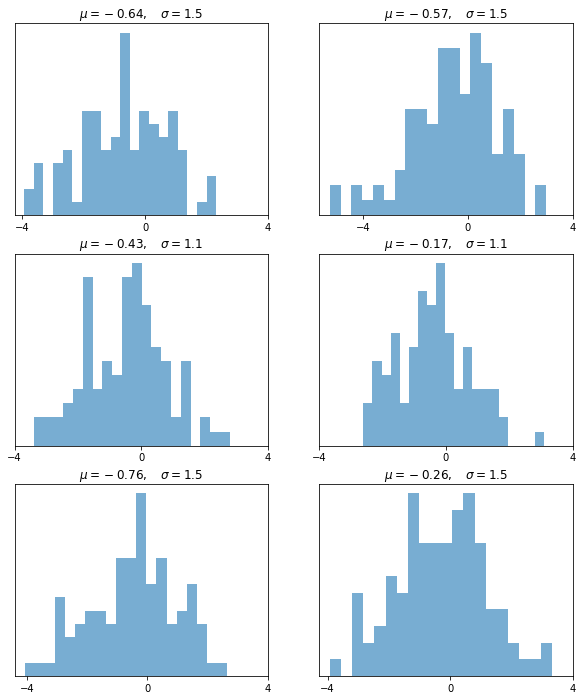

In [27]:
num_rows,num_cols=3,2
fig,axes=plt.subplots(num_rows,num_cols,figsize=(10,12))
for i in range(num_rows):
    for j in range(num_cols):
        m,s =uniform(-1,1),uniform(1,2)
        x=norm.rvs(loc=m,scale=s,size=100)
        axes[i,j].hist(x,alpha=0.6,bins=20)
        t=f'$\mu={m:.2},\quad \sigma={s:.2}$'
        axes[i,j].set(title=t,xticks=[-4,0,4],yticks=[])
plt.show()
        

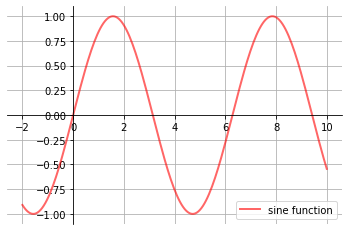

In [28]:
def subplots():
    "Custom subplots with axes through the origin"
    fig, ax = plt.subplots()
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')     
    ax.grid()
    return fig, ax
fig, ax = subplots() # Call the local version, not plt.subplots()
x = np.linspace(-2, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')
plt.show()

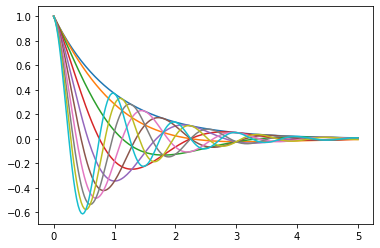

In [30]:
def f(x,θ):
    return np.cos(np.pi*θ*x)* np.exp(-x)

θ_vals = np.linspace(0, 2, 10)
x=np.linspace(0,5,200)
fig,ax=plt.subplots()
for θ in θ_vals:
    ax.plot(x,f(x,θ))
    
plt.show()

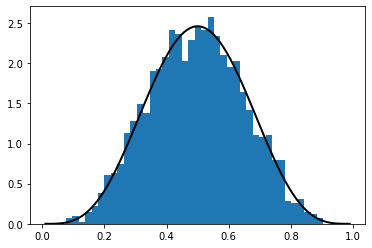

In [32]:
from scipy.stats import beta
q=beta(5,5)
obs=q.rvs(2000)
grid=np.linspace(0.01,0.99,100)

fig,ax=plt.subplots()
ax.hist(obs,bins=40,density=True)
ax.plot(grid,q.pdf(grid),'k-',linewidth=2)
plt.show()

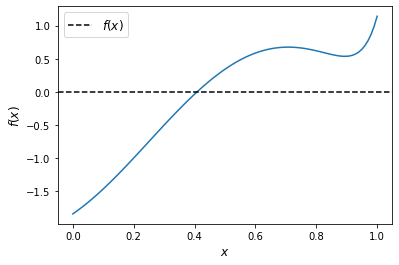

In [33]:
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
x = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.axhline(ls='--', c='k', label='$f(x)$')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=12)
ax.legend(fontsize=12)
plt.show()

In [41]:
def bisect(f,a,b,tol=10e-5):
    lower,upper=a,b
    if upper-lower<tol:
        return 0.5*(upper-lower)
    else:
        middle=0.5*(upper+lower)
        print(f'Current mide point={middle}')
        if f(middle)>0:
              return bisect(f,lower,middle)
        else:
              return bisect(f,middle,upper)
              
                  

In [42]:
f= lambda x:np.sin(4 *(x-0.25)+x+x**20-1)
bisect(f,0,1)

Current mide point=0.5
Current mide point=0.25
Current mide point=0.375
Current mide point=0.4375
Current mide point=0.40625
Current mide point=0.390625
Current mide point=0.3984375
Current mide point=0.40234375
Current mide point=0.400390625
Current mide point=0.3994140625
Current mide point=0.39990234375
Current mide point=0.400146484375
Current mide point=0.4000244140625
Current mide point=0.39996337890625


3.0517578125e-05

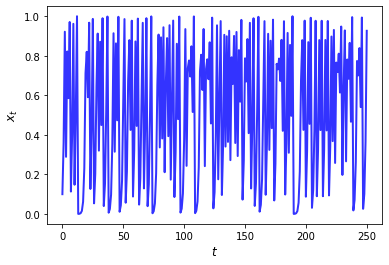

In [3]:
α = 4.0
def qm(x0,n):
    x=np.empty(n+1)
    x[0]=x0
    for t in range(n):
        x[t+1]=α * x[t] * (1 - x[t])
    return x

x=qm(0.1,250)
fig,ax=plt.subplots()
ax.plot(x,'b-',lw=2,alpha=0.8)
ax.set_xlabel('$t$',fontsize=12)
ax.set_ylabel('$x_{t}$',fontsize=12)
plt.show()

In [4]:
from numba import jit
qm_numba=jit(qm)

In [5]:
n = 10_000_000
qe.tic()
qm(0.1, int(n))
time1 = qe.toc()

NameError: name 'qe' is not defined

In [6]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
n = 10_000_000
qe.tic()
qm(0.1, int(n))
time1 = qe.toc()

TOC: Elapsed: 0:00:13.66


In [8]:
n = 10_000_000
qe.tic()
qm(0.1, int(n))
time1 = qe.toc()

TOC: Elapsed: 0:00:13.33


In [9]:
qe.tic()
qm_numba(0.1, int(n))
time2 = qe.toc()

TOC: Elapsed: 0:00:0.32


In [10]:
qe.tic()
qm_numba(0.1, int(n))
time3 = qe.toc()

TOC: Elapsed: 0:00:0.07


In [11]:
time1 / time3

169.2229098138661

In [16]:
from numba import jitclass, float64
solow_data = [
    ('n', float64),
    ('s', float64),
    ('δ', float64),
    ('α', float64),
    ('z', float64),
    ('k', float64)
]
@jitclass(solow_data)
class Solow:
    r"""
    Implements the Solow growth model with the update rule
    k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)
    """
    def __init__(self, n=0.05, # population growth rate
        s=0.25, # savings rate
        δ=0.1, # depreciation rate
        α=0.3, # share of labor
        z=2.0, # productivity
        k=1.0): # current capital stock
        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k
    def h(self):
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)
    def update(self):
        self.k = self.h()
    def steady_state(self):
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        return ((s * z) / (n + δ))**(1 / (1 - α))
    def generate_sequence(self, t):
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

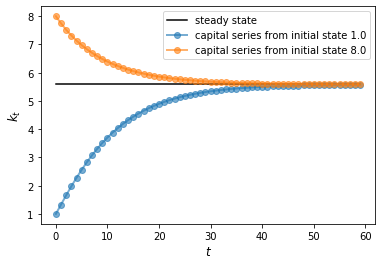

In [14]:
s1 = Solow()
s2 = Solow(k=8.0)
T = 60
fig, ax = plt.subplots()
# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')
# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)
ax.set_ylabel('$k_{t}$', fontsize=12)
ax.set_xlabel('$t$', fontsize=12)
ax.legend()
plt.show()

In [19]:
from random import uniform
from numba import njit
@njit
def calculate_pi(n=1_000_000):
    count = 0
    for i in range(n):
        u, v = uniform(0, 1), uniform(0, 1)
        d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)
        if d < 0.5:
            count += 1
    area_estimate = count / n
    return area_estimate * 4 # dividing by radius**2

In [20]:
%time calculate_pi()

Wall time: 302 ms


3.140652

In [21]:
%time calculate_pi()

Wall time: 18 ms


3.141312

In [22]:
p, q = 0.1, 0.2
def compute_series(n):
    x = np.empty(n, dtype=np.int_)
    x[0] = 1 # Start in state 1
    U = np.random.uniform(0, 1, size=n)
    for t in range(1, n):
        current_x = x[t-1]
        if current_x == 0:
            x[t] = U[t] < p
        else:
            x[t] = U[t] > q
    return x

In [23]:
n = 1_000_000
x = compute_series(n)
print(np.mean(x == 0))

0.665554


In [24]:
qe.tic()
compute_series(n)
qe.toc()

TOC: Elapsed: 0:00:1.00


1.0054597854614258

In [25]:
from numba import jit
compute_series_numba = jit(compute_series)

In [26]:
x = compute_series_numba(n)
print(np.mean(x == 0))

0.666041


In [27]:
qe.tic()
compute_series_numba(n)
qe.toc()

TOC: Elapsed: 0:00:0.01


0.01972198486328125

In [28]:
def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)
grid = np.linspace(-3, 3, 5000)
x, y = np.meshgrid(grid, grid)

In [29]:
%timeit np.max(f(x, y))

1.76 s ± 126 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
from numba import vectorize

In [31]:
@vectorize('float64(float64, float64)', target='parallel')
def f_vec(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)
np.max(f_vec(x, y))

0.9999992797121728

In [32]:
%timeit np.max(f_vec(x, y))

110 ms ± 12.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
from numpy.random import randn
from numba import njit

@njit
def h(w, r=0.1, s=0.3, v1=0.1, v2=1.0):
    R = np.exp(v1 * randn()) * (1 + r)
    y = np.exp(v2 * randn())
    # Update wealth
    w = R * s * w + y
    return w

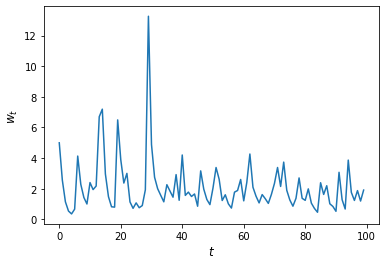

In [34]:
fig, ax = plt.subplots()
T = 100
w = np.empty(T)
w[0] = 5
for t in range(T-1):
    w[t+1]=h(w[t])

ax.plot(w)
ax.set_xlabel('$t$',fontsize=12)
ax.set_ylabel('$w_{t}$',fontsize=12)
plt.show()

In [35]:
@njit
def compute_long_run_median(w0=1, T=1000, num_reps=50_000):
    obs = np.empty(num_reps)
    for i in range(num_reps):
        w = w0
        for t in range(T):
            w=h(w)
        obs[i]=w
    return np.median(obs)

In [36]:
%%time
compute_long_run_median()

Wall time: 8.37 s


1.8322471713921071

In [37]:
from numba import prange
@njit(parallel=True)
def compute_long_run_median_parallel(w0=1, T=1000, num_reps=50_000):
    obs = np.empty(num_reps)
    for i in prange(num_reps):
        w = w0
        for t in range(T):
            w=h(w)
        obs[i]=w
    return np.median(obs)

In [38]:
%%time
compute_long_run_median_parallel()

Wall time: 2.27 s


1.8393235333092681

In [39]:
from random import uniform
@njit(parallel=True)
def calculate_pi(n=1000000):
    count=0
    for i in prange(n):
        u,v=uniform(0,1),uniform(0,1)
        d=np.sqrt((u-0.5)**2+(v-0.5)**2)
        if d< 0.5:
            count+=1
    area_estimate =count/n
    return area_estimate*4

In [40]:
%time calculate_pi()

Wall time: 558 ms


3.140596

In [41]:
%time calculate_pi()

Wall time: 8.98 ms


3.141532